In [2]:
from climada.util.api_client import Client
client = Client()

/Users/arnaudgoussebaile/miniconda3/envs/climada_env/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 8.0.0. Please consider upgrading.
  warnings.warn(


In [3]:
import pandas as pd
data_types = client.list_data_type_infos()

dtf = pd.DataFrame(data_types)
dtf.sort_values(['data_type_group', 'data_type'])

,data_type,data_type_group,status,description,properties,key_reference,version_notes
6,centroids,centroids,active,None,"[{'property': 'res_arcsec_land', 'mandatory': ...",[],[]
4,crop_production,exposures,active,Historical and twenty-first century crop produ...,"[{'property': 'crop', 'mandatory': True, 'desc...","[{'ref_no': 1, 'ref_url': 'https://doi.org/10....",[]
10,crops,exposures,active,Crop exposure for Switzerland in 2021 obtained...,"[{'property': 'crop', 'mandatory': True, 'desc...","[{'ref_no': 1, 'ref_url': 'https://doi.org/10....",[]
0,litpop,exposures,active,A global high-resolution asset exposure datase...,"[{'property': 'spatial_coverage', 'mandatory':...","[{'ref_no': 1, 'ref_url': 'https://doi.org/10....","[{'version': 'v2', 'notes': 'Countries with no..."
8,earthquake,hazard,active,Earthquake hazard sets at 150 arcsec (ca. 4km)...,"[{'property': 'res_arcsec', 'mandatory': True,...","[{'ref_no': 1, 'ref_url': None, 'key_reference...",[]
9,flood,hazard,active,Flood footprint of historical events at a 200m...,"[{'property': 'date_creation', 'mandatory': Tr...",[],[]
12,hail,hazard,active,Radar-based daily hail hazard data at 1km spat...,"[{'property': 'variable', 'mandatory': True, '...","[{'ref_no': 1, 'ref_url': 'https://doi.org/10....",[]
7,relative_cropyield,hazard,active,Historical and twenty-first century crop produ...,"[{'property': 'climate_scenario', 'mandatory':...","[{'ref_no': 1, 'ref_url': 'https://doi.org/10....",[]
3,river_flood,hazard,active,River flood [flood depth in meters and flooded...,"[{'property': 'res_arcsec', 'mandatory': True,...","[{'ref_no': 1, 'ref_url': 'https://www.nature....","[{'version': 'v2', 'notes': 'Higher resolution..."
5,storm_europe,hazard,active,European winter storm [gust in meters per seco...,"[{'property': 'data_source', 'mandatory': Fals...","[{'ref_no': 1, 'ref_url': 'https://www.nat-haz...",[]


In [9]:
wildfire_dataset_infos = client.list_dataset_infos(data_type='wildfire')
flood_dataset_infos = client.list_dataset_infos(data_type='flood')
river_flood_dataset_infos = client.list_dataset_infos(data_type='river_flood')
tropical_cyclone_dataset_infos = client.list_dataset_infos(data_type='tropical_cyclone')
storm_europe_dataset_infos = client.list_dataset_infos(data_type='storm_europe')

In [15]:
all_properties = client.get_property_values(tropical_cyclone_dataset_infos)
all_properties.keys()
client.get_property_values(tropical_cyclone_dataset_infos, known_property_values = {'country_name':'Italy'})

{'res_arcsec': ['150'],
 'event_type': ['synthetic', 'observed'],
 'model_name': ['random_walk', 'STORM'],
 'spatial_coverage': ['country'],
 'climate_scenario': ['rcp26', 'rcp45', 'None', 'rcp60', 'rcp85'],
 'ref_year': ['2040', '2060', '2080'],
 'country_iso3alpha': ['ITA'],
 'country_name': ['Italy'],
 'country_iso3num': ['380'],
 'gcm': ['CMCC-CM2-VHR4', 'CNRM-CM6-1-HR', 'EC-Earth3P-HR', 'HadGEM3-GC31-HM']}

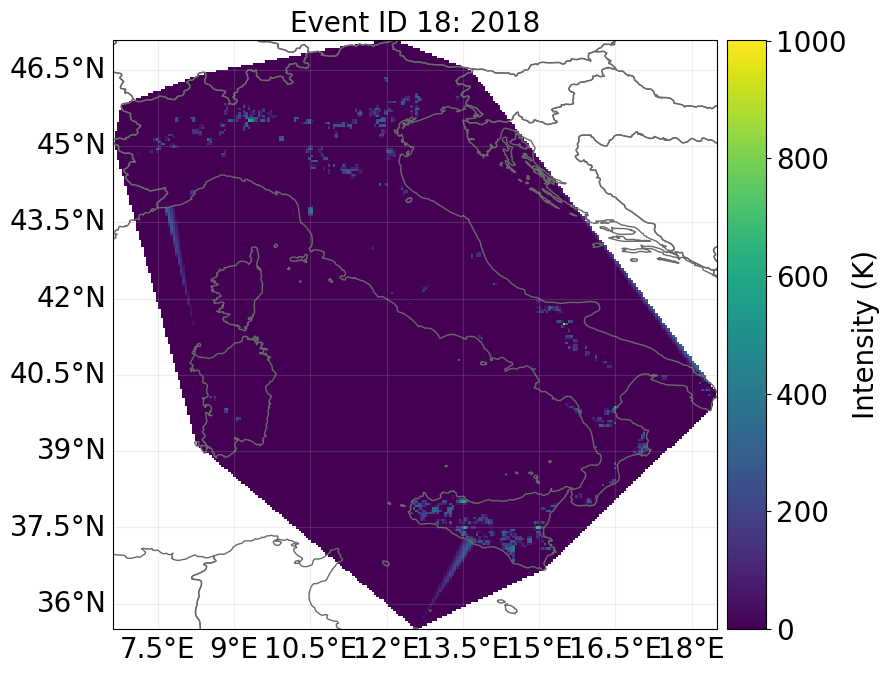

In [18]:
Wildfire_Italy = client.get_hazard('wildfire', properties={'country_name': 'Italy', 'climate_scenario': 'historical'})
Wildfire_Italy.plot_intensity(18);